# AMS 561 Homework 5  (Pandas & Statistical Modeling)

First, we will need to import the following libraries:

In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

import matplotlib.pyplot as plt
%matplotlib inline

## Problem 1  Warmup
**1(a)** Create a pandas Series object with values given by the first 10 positive even integers (2, 4, ..., 20) and with indices given by the first 10 letters of English alphabet.  Display the result.

In [4]:
indices = np.array(['a','b','c','d','e','f','g','h','i','j'])
values = np.array(['2','4','6','8','10','12','14','16','18','20'])
s = pd.Series(values, indices)
print (s)

a     2
b     4
c     6
d     8
e    10
f    12
g    14
h    16
i    18
j    20
dtype: object


**1(b)** 1) Create a pandas DataFrame object that represents the data from the table below:

|Rank|Name| NetWorth_Mill | Age |
|--|-------------------------------|
|1 |George Lucas  |5500 | 74 |
|2 |Steven Spielberg |3700 | 72 |
|3 |Oprah Winfrey  |3200 | 65 |
|4 |Michael Jordan  |1700 | 46 |
|5 |Paul McCartney  |1200 | 76 |

(data from [source](https://list25.com/25-richest-celebrities-with-the-highest-net-worth/)). Use "Rank" as the indices. Display your result.

In [5]:
d = {'Rank': ['1', '2', '3', '4', '5'], 'Name': ['George Lucas', 'Steven Spielberg', 'Oprah Winfrey', 'Michael Jordan', 'Paul McCartney'], 'NetWorth_Mill': [5500, 3700, 3200, 1700, 1200], 'Age': [74, 72, 65, 46, 76]}
df = pd.DataFrame(data=d)
df = df.set_index('Rank')
print(df)

                  Name  NetWorth_Mill  Age
Rank                                      
1         George Lucas           5500   74
2     Steven Spielberg           3700   72
3        Oprah Winfrey           3200   65
4       Michael Jordan           1700   46
5       Paul McCartney           1200   76


2) There is actually a typo in Michael Jordan's age. It should be 56 instead of 46. Make this correction in your DataFrame (without creating a new DataFrame). Display the result.

In [6]:
df['Age'] = df['Age'].replace(46, 56)
print(df)

                  Name  NetWorth_Mill  Age
Rank                                      
1         George Lucas           5500   74
2     Steven Spielberg           3700   72
3        Oprah Winfrey           3200   65
4       Michael Jordan           1700   56
5       Paul McCartney           1200   76


3) Display only the 'NetWorth_Mill' column.

In [7]:
print(df['NetWorth_Mill'])

Rank
1    5500
2    3700
3    3200
4    1700
5    1200
Name: NetWorth_Mill, dtype: int64


4) Compute the average age, mininum age, and maximum age of these top 5 people.

In [8]:
print("Minimum age = ", df['Age'].min())
print("Maximum age = ", df['Age'].max())
print("Average age = ", df['Age'].mean())

Minimum age =  56
Maximum age =  76
Average age =  68.6


5) Sort the 'Age' column in descending order. 

In [9]:
df.sort_values(by='Age', ascending=False)

,Name,NetWorth_Mill,Age
Rank,,,
5,Paul McCartney,1200,76
1,George Lucas,5500,74
2,Steven Spielberg,3700,72
3,Oprah Winfrey,3200,65
4,Michael Jordan,1700,56


## Problem 2 : more on Pandas
1) Download the file ""BoxOffice2018.csv" to your current directory and use `read_csv` function in Pandas to read this csv file and create a DataFrame named "df_box". This data is the top 30 highest earning movies in 2018.  The data is from www.boxofficemojo.com. 

In [10]:
df_box = pd.read_csv('BoxOffice2018.csv',index_col=False)
df_box = df_box.set_index('Rank')
print(df_box)

                                      Movie_Title   Studio  \
Rank                                                         
1                                   Black Panther       BV   
2                          Avengers: Infinity War       BV   
3                                   Incredibles 2       BV   
4                  Jurassic World: Fallen Kingdom     Uni.   
5                                         Aquaman       WB   
6                                      Deadpool 2      Fox   
7                    Dr. Seuss' The Grinch (2018)     Uni.   
8                   Mission: Impossible - Fallout     Par.   
9                            Ant-Man and the Wasp       BV   
10                              Bohemian Rhapsody      Fox   
11                          A Star is Born (2018)       WB   
12                        Solo: A Star Wars Story       BV   
13                                   Venom (2018)     Sony   
14                      Ralph Breaks the Internet       BV   
15      

2) Use `info` method to get the summary of our DataFrame. How many columns are there?  How many rows of data? (Answer these questions in a Markdown cell.)

In [11]:
#df_box = pd.read_csv('BoxOffice2018.csv',index_col=False)
df_box.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 8 columns):
Movie_Title               30 non-null object
Studio                    30 non-null object
Total Gross / Theaters    30 non-null object
Unnamed: 4                30 non-null object
Opening / Theaters        30 non-null object
Unnamed: 6                30 non-null object
Open                      30 non-null int64
Close                     30 non-null object
dtypes: int64(1), object(7)
memory usage: 2.1+ KB


Your answers: Number of Columns - 8
              Number of Rows (not including column header) - 30

3) Display the first 5 rows of the data

In [12]:
df_box[:5]

,Movie_Title,Studio,Total Gross / Theaters,Unnamed: 4,Opening / Theaters,Unnamed: 6,Open,Close
Rank,,,,,,,,
1,Black Panther,BV,"$700,059,566","4,084","$202,003,951","4,020",43512,9-Aug
2,Avengers: Infinity War,BV,"$678,815,482","4,474","$257,698,183","4,474",43582,13-Sep
3,Incredibles 2,BV,"$608,581,744","4,410","$182,687,905","4,410",43631,13-Dec
4,Jurassic World: Fallen Kingdom,Uni.,"$417,719,760","4,485","$148,024,610","4,475",43638,4-Oct
5,Aquaman,WB,"$334,826,690","4,184","$67,873,522","4,125",43820,-


4) It probably makes more sense if we use the "Rank" column as an index. Do this and display the first 10 rows. 

In [13]:
df_box[:10]

,Movie_Title,Studio,Total Gross / Theaters,Unnamed: 4,Opening / Theaters,Unnamed: 6,Open,Close
Rank,,,,,,,,
1,Black Panther,BV,"$700,059,566","4,084","$202,003,951","4,020",43512,9-Aug
2,Avengers: Infinity War,BV,"$678,815,482","4,474","$257,698,183","4,474",43582,13-Sep
3,Incredibles 2,BV,"$608,581,744","4,410","$182,687,905","4,410",43631,13-Dec
4,Jurassic World: Fallen Kingdom,Uni.,"$417,719,760","4,485","$148,024,610","4,475",43638,4-Oct
5,Aquaman,WB,"$334,826,690","4,184","$67,873,522","4,125",43820,-
6,Deadpool 2,Fox,"$318,491,426","4,349","$125,507,153","4,349",43603,18-Oct
7,Dr. Seuss' The Grinch (2018),Uni.,"$270,620,950","4,141","$67,572,855","4,141",43778,14-Feb
8,Mission: Impossible - Fallout,Par.,"$220,159,104","4,395","$61,236,534","4,386",43673,18-Oct
9,Ant-Man and the Wasp,BV,"$216,648,740","4,206","$75,812,205","4,206",43652,1-Nov


5) Let's rename some columns so that we can access them as attributes in Python.
    - Rename the column "Total Gross / Theaters" to "Total_Gross"
    - Raname the column "Unnamed: 4" (it's the column to the right of ""Total Gross / Theaters") to "Theaters_Total"
    - Raname the column "Opening / Theaters" to "Opening"
    - Raname the column "Unnamed: 6" to "Theaters_Opening"
    - Display the first 5 rows to show the result. 

In [14]:
df_box = df_box.rename(columns={"Total Gross / Theaters": "Total Gross"})
df_box = df_box.rename(columns={"Unnamed: 4": "Theaters_Total"})
df_box = df_box.rename(columns={"Opening / Theaters": "Opening"})
df_box = df_box.rename(columns={"Unnamed: 6": "Theaters_Opening"})
df_box[:5]

,Movie_Title,Studio,Total Gross,Theaters_Total,Opening,Theaters_Opening,Open,Close
Rank,,,,,,,,
1,Black Panther,BV,"$700,059,566","4,084","$202,003,951","4,020",43512,9-Aug
2,Avengers: Infinity War,BV,"$678,815,482","4,474","$257,698,183","4,474",43582,13-Sep
3,Incredibles 2,BV,"$608,581,744","4,410","$182,687,905","4,410",43631,13-Dec
4,Jurassic World: Fallen Kingdom,Uni.,"$417,719,760","4,485","$148,024,610","4,475",43638,4-Oct
5,Aquaman,WB,"$334,826,690","4,184","$67,873,522","4,125",43820,-


6) Delete the columns "Open" and "Close" so that we have a cleaner data. 

In [15]:
df_box = df_box.drop(columns=['Open', 'Close'])
df_box

,Movie_Title,Studio,Total Gross,Theaters_Total,Opening,Theaters_Opening
Rank,,,,,,
1,Black Panther,BV,"$700,059,566","4,084","$202,003,951","4,020"
2,Avengers: Infinity War,BV,"$678,815,482","4,474","$257,698,183","4,474"
3,Incredibles 2,BV,"$608,581,744","4,410","$182,687,905","4,410"
4,Jurassic World: Fallen Kingdom,Uni.,"$417,719,760","4,485","$148,024,610","4,475"
5,Aquaman,WB,"$334,826,690","4,184","$67,873,522","4,125"
6,Deadpool 2,Fox,"$318,491,426","4,349","$125,507,153","4,349"
7,Dr. Seuss' The Grinch (2018),Uni.,"$270,620,950","4,141","$67,572,855","4,141"
8,Mission: Impossible - Fallout,Par.,"$220,159,104","4,395","$61,236,534","4,386"
9,Ant-Man and the Wasp,BV,"$216,648,740","4,206","$75,812,205","4,206"


7) The columns that contain "numbers" are not of numerical type. We will convert them to integers. 
- In the "Total_Gross" and "Opening", remove the "$" and "," and casts the results to integers. Replace the original columns with the transformed columns.
- In the "Theaters_Total" and "Theaters_Opening", remove the "," and casts the results to integers
- Display the result with `df_box.head()`
- Check the types of columns by using `df_box.info()` . (now you should  those columns are now of `int64`(integer) type) 

In [16]:
df_box = pd.read_csv('BoxOffice2018.csv',index_col=False)
df_box = df_box.set_index('Rank')

df_box = df_box.rename(columns={"Total Gross / Theaters": "Total Gross"})
df_box = df_box.rename(columns={"Unnamed: 4": "Theaters_Total"})
df_box = df_box.rename(columns={"Opening / Theaters": "Opening"})
df_box = df_box.rename(columns={"Unnamed: 6": "Theaters_Opening"})

df_box = df_box.drop(columns=['Open', 'Close'])

#converting total gross to int
TG = df_box['Total Gross'].tolist()
for i in range(len(TG)):
    TG[i] = TG[i].replace('$','').replace(',','')
    TG[i] = int(TG[i])
df_box['Total Gross'] = TG
#print(df_box)

#converting opening to int
O = df_box['Opening'].tolist()
for i in range(len(O)):
    O[i] = O[i].replace('$','').replace(',','')
    O[i] = int(O[i])
df_box['Opening'] = O
#print(df_box)

#converting theaters total to int
TT = df_box['Theaters_Total'].tolist()
for i in range(len(TT)):
    TT[i] = TT[i].replace(',','')
    TT[i] = int(TT[i])
df_box['Theaters_Total'] = TT

#converting theaters opening to int
TO = df_box['Theaters_Opening'].tolist()
for i in range(len(TO)):
    TO[i] = TO[i].replace(',','')
    TO[i] = int(TO[i])
df_box['Theaters_Opening'] = TO

print(df_box)



                                      Movie_Title   Studio  Total Gross  \
Rank                                                                      
1                                   Black Panther       BV    700059566   
2                          Avengers: Infinity War       BV    678815482   
3                                   Incredibles 2       BV    608581744   
4                  Jurassic World: Fallen Kingdom     Uni.    417719760   
5                                         Aquaman       WB    334826690   
6                                      Deadpool 2      Fox    318491426   
7                    Dr. Seuss' The Grinch (2018)     Uni.    270620950   
8                   Mission: Impossible - Fallout     Par.    220159104   
9                            Ant-Man and the Wasp       BV    216648740   
10                              Bohemian Rhapsody      Fox    215983200   
11                          A Star is Born (2018)       WB    215252091   
12                       

In [17]:
df_box.head()

,Movie_Title,Studio,Total Gross,Theaters_Total,Opening,Theaters_Opening
Rank,,,,,,
1,Black Panther,BV,700059566,4084,202003951,4020
2,Avengers: Infinity War,BV,678815482,4474,257698183,4474
3,Incredibles 2,BV,608581744,4410,182687905,4410
4,Jurassic World: Fallen Kingdom,Uni.,417719760,4485,148024610,4475
5,Aquaman,WB,334826690,4184,67873522,4125


In [18]:
df_box.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 1 to 30
Data columns (total 6 columns):
Movie_Title         30 non-null object
Studio              30 non-null object
Total Gross         30 non-null int64
Theaters_Total      30 non-null int64
Opening             30 non-null int64
Theaters_Opening    30 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.6+ KB


8) Now we are ready to compute some statistics (of these top 30 movies). Write a code to answer the following questions:
- What is the standard deviation of the total gross?
- What is the mininum of "Theaters_Total"?
- What is the maximum of "Theaters_Opening"?
- What is the 80 percentile (0.8 quantile) of "Opening"?

In [19]:
df_box['Total Gross'].std()

160388617.42100227

In [20]:
df_box['Theaters_Total'].min()

3329

In [21]:
df_box['Theaters_Opening'].max()

4475

In [22]:
df_box['Opening'].quantile(.8)

81088702.60000001

9) Write a code to find how many movies(in the top30) each studio made. (e.g. BV (Buenva Vista) produced 8 movies that were in the top30), ...).  Display your answer.

In [23]:
df_box['Studio'].value_counts()

WB         8
BV         7
Uni.       4
Sony       4
Par.       3
Fox        2
MGM        1
WB (NL)    1
Name: Studio, dtype: int64

10) How much money (from Total_Gross) did each studio earn from all of their movies in the top30? (Note: to make it easy, you don't need to combine "WB" and "WB(NL)").  Display your result.

In [24]:
sum1 = df_box.loc[df_box.Studio=='WB','Total Gross']
sum1 = sum1.sum()
print("WB studios sum =", sum1)

sum2 = df_box.loc[df_box.Studio=='BV','Total Gross']
sum2 = sum2.sum()
print("BV studios sum =", sum2)

sum3 = df_box.loc[df_box.Studio=='Sony','Total Gross']
sum3 = sum3.sum()
print("Sony studios sum =", sum3)

sum4 = df_box.loc[df_box.Studio=='Uni.','Total Gross']
sum4 = sum4.sum()
print("Universal studios sum =", sum4)

sum5 = df_box.loc[df_box.Studio=='Par.','Total Gross']
sum5 = sum5.sum()
print("Paramount studios sum =", sum5)

sum6 = df_box.loc[df_box.Studio=='Fox','Total Gross']
sum6 = sum6.sum()
print("Fox studios sum =", sum6)

sum7 = df_box.loc[df_box.Studio=='WB (NL)','Total Gross']
sum7 = sum7.sum()
print("WB (NL) studios sum =", sum7)

sum8 = df_box.loc[df_box.Studio=='MGM','Total Gross']
sum8 = sum8.sum()
print("MGM studios sum =", sum8)

studio_sums = {"WB":sum1, "BV":sum2, "Sony":sum3, "Universal Studios":sum4, "Paramount":sum5, "Fox":sum6, "WB(NL)":sum7, "MGM":sum8}
studio_sums

WB studios sum = 1411324635
BV studios sum = 2790704750
Sony studios sum = 686215417
Universal studios sum = 968317660
Paramount studios sum = 535379054
Fox studios sum = 534474626
WB (NL) studios sum = 117450119
MGM studios sum = 115715889


{'WB': 1411324635,
 'BV': 2790704750,
 'Sony': 686215417,
 'Universal Studios': 968317660,
 'Paramount': 535379054,
 'Fox': 534474626,
 'WB(NL)': 117450119,
 'MGM': 115715889}

11) Sort the "Opening" column in descending order (i.e., highest opening first) and display the data of the top 5 "Opening".  What movie has the third-highest opening? Answer this in the markdown cell below.

In [25]:
df_new = df_box
df_new = df_new.sort_values(by='Opening', ascending=False)
df_new[:5]

,Movie_Title,Studio,Total Gross,Theaters_Total,Opening,Theaters_Opening
Rank,,,,,,
2,Avengers: Infinity War,BV,678815482,4474,257698183,4474
1,Black Panther,BV,700059566,4084,202003951,4020
3,Incredibles 2,BV,608581744,4410,182687905,4410
4,Jurassic World: Fallen Kingdom,Uni.,417719760,4485,148024610,4475
6,Deadpool 2,Fox,318491426,4349,125507153,4349


Your answer: Incredibles 2 

12) Use the built-in pandas plotting tools (e.g. `plot` method) to make 2 bargraphs for 
1. The top 10 highest-grossing movies with the names of the movies on the y-axis and the total gross on the x-axis.
2. The studio names on the y-axis and the total money (from Total_Gross) they earn from their movies in the top30 on the x-axis. 

Don't forget to label the axes.
Hint: For each plot, you can create a new DataFrame which contains only the data you want and then apply `plot` method.

Rank
1                      Black Panther
2             Avengers: Infinity War
3                      Incredibles 2
4     Jurassic World: Fallen Kingdom
5                            Aquaman
6                         Deadpool 2
7       Dr. Seuss' The Grinch (2018)
8      Mission: Impossible - Fallout
9               Ant-Man and the Wasp
10                 Bohemian Rhapsody
Name: Movie_Title, dtype: object
Rank
1     700059566
2     678815482
3     608581744
4     417719760
5     334826690
6     318491426
7     270620950
8     220159104
9     216648740
10    215983200
Name: Total Gross, dtype: int64


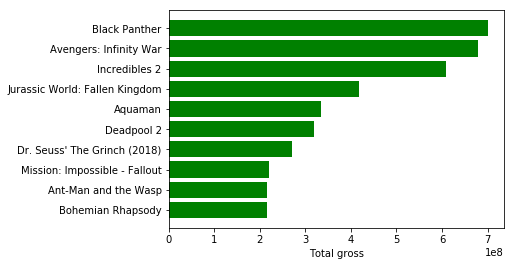

In [31]:
df_new = df_box.sort_values(by='Total Gross', ascending=False)
df_new = df_new[: 10]
movies = df_new['Movie_Title']
print(movies)

tg = df_new['Total Gross']
print(tg)

fig, ax = plt.subplots()

ax.barh(movies, tg, align='center', color='green', ecolor='black')
ax.set_yticks(movies)
ax.set_yticklabels(movies)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Total gross")

plt.show()

['WB', 'BV', 'Sony', 'Universal Studios', 'Paramount', 'Fox', 'WB(NL)', 'MGM']
[1411324635, 2790704750, 686215417, 968317660, 535379054, 534474626, 117450119, 115715889]


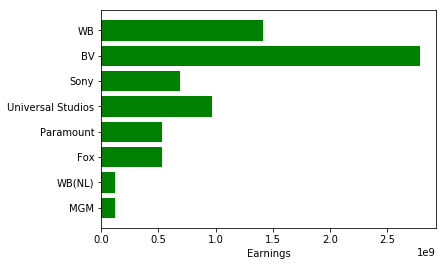

In [40]:
studio_sums

studios = list()
for i in studio_sums.keys():
    studios.append(i)
#print(studios) 

money = list()
for i in studio_sums.values():
    money.append(i)
#print(money) 


fig, ax = plt.subplots()

ax.barh(studios, money, align='center', color='green', ecolor='black')
ax.set_yticks(studios)
ax.set_yticklabels(studios)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Earnings")

plt.show()

## Problem 3 : Linear Regression

Download the file "data_linear_regression_hw5.csv" and create a DataFrame from this data

In [4]:
df_la = pd.read_csv('data_linear_regression_hw5.csv',index_col=False)
print(df_la)

          x1        x2        x3          y
0   0.148227  0.446577 -1.009014   4.138490
1   0.353487 -0.648183  0.796402   2.980097
2  -1.087250 -0.622992 -0.667353   3.507599
3   0.247096  1.072407  1.910038  17.975063
4  -0.156840 -0.557375  1.317638   2.496506
5   0.437086 -1.047299 -0.879279  -5.902661
6  -0.846221 -0.627335  0.006226   0.702818
7   2.166546 -0.127935 -2.004617 -20.896878
8   0.334282  1.188975  1.432864  17.863417
9  -0.377876  0.145346 -0.587793   3.285550
10  0.596387 -0.537030  1.255144   9.856794
11  2.053356  0.673001  0.089293  20.030393
12 -0.040022 -2.208230  0.351417  -5.686052
13 -0.576821  0.221037  1.026551   0.119210
14 -0.060936  0.724872  1.028151   8.616198
15  0.997778  0.479060 -1.319292   0.802295
16  1.775045 -0.903475 -1.055086 -15.520568
17 -1.337874 -0.219139 -0.105312   0.343265
18  0.798311  0.515993 -0.072059  10.604725
19 -1.762909  1.496594 -1.253833   6.823674
20 -0.264704  0.887104  1.064500   6.982477
21 -0.057025  0.205599 -0.333292

In [5]:
df_la.head()

,x1,x2,x3,y
0,0.148227,0.446577,-1.009014,4.138490
1,0.353487,-0.648183,0.796402,2.980097
2,-1.087250,-0.622992,-0.667353,3.507599
3,0.247096,1.072407,1.910038,17.975063
4,-0.156840,-0.557375,1.317638,2.496506


In [6]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
x1    50 non-null float64
x2    50 non-null float64
x3    50 non-null float64
y     50 non-null float64
dtypes: float64(4)
memory usage: 1.6 KB


Using the method `head` or `info` you will see that there are 4 columns.   `x1`, `x2`, `x3` are input(independent) variables and `y` is the response(dependent) variable. We will perform ordinary linear regression on this data based on two guesses.

**1st model:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$
Perform ordinary linear regression (use `ols` in `statsmodels.formula.api` (we imported this as `smf`)) to find the coefficients 
- Print out the test statistics using `summary` method.

In [60]:
import patsy
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x3", df_la)
model = sm.OLS(y, X)
result = model.fit()
result.params

array([ 3.97643899, -0.06759982,  6.03268212,  2.74381735])

In [62]:
model2 = smf.ols("y ~ 1 + x1 + x2 + x3", df_la)
result2 = model2.fit()
result2.params
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.766
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           0.000105
Time:                        11:42:03   Log-Likelihood:                -170.25
No. Observations:                  50   AIC:                             348.5
Df Residuals:                      46   BIC:                             356.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9764      1.081      3.680      0.001       1.801       6.152
x1            -0.0676      1.061     -0.064      0.949      -2.203       2.068
x2             6.0327      1.290      4.678      0.000       3.437       8.629
x3             2.7438      0.985      2.786      0.008       0.761       4.726
==============================================================================
Omnibus:                        6.370   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                7.000
Skew:                          -0.419   Prob(JB):                       0.0302
Kurtosis:                       4.631   Cond. No.                         1.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer the following questions:
-  What are the cofficients $\beta_0, \beta_1, \beta_2, \beta_3 $ (in our model: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$)?
-  By looking at just the $t$-statistics, which coefficient is most likely to be non-zero?
-  What is the R-squared of our first model? Do you think this model fits the data very well?  Why?


[your answer here]: 
(Q) What are the cofficients  𝛽0,𝛽1,𝛽2,𝛽3  (in our model:  𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+𝛽3𝑥3 )?
(A) 𝛽0 = 3.9764
    𝛽1 = -0.0676
    𝛽2 = 6.0327
    𝛽3 = 2.7438

(Q) By looking at just the  𝑡 -statistics, which coefficient is most likely to be non-zero?
(A) 𝛽2 is most likely to be non-zero

(Q) What is the R-squared of our first model? Do you think this model fits the data very well? Why?
(A) 0.36 is the R-squared of our first model. No, the model does not fit the data very well. Generally,  R-squared value           provides an estimate of the strength of the relationship between your model and the response variable. In this model, the       co-efficients are provided based on the only few of the interaction terms between the variables x1, x2 and x3. Hence the       model does not fit the given data very well. 

Let's try to include all interaction terms of the input variables $x_1, x_2, x_3$.
What are all the possible interaction terms? (Hint: all the $x_i x_j$). Add your answers to the equations in the cell below with a coefficient $\beta_i$ in front.

**2st model:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 $ + ...(add your interaction terms here)...

- Perform ordinary linear regression (use `ols` in `statsmodels.formula.api` (we imported this as `smf`)) to find the coefficients 
- Print out the test statistics using `summary` method.

In [9]:
model2 = smf.ols("y ~ 1 + x1 + x2 + x3 + x1*x2 + x2*x3 + x1*x3", df_la)
result2 = model2.fit()
result2.params
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2590.
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           2.50e-53
Time:                        12:03:13   Log-Likelihood:                -34.241
No. Observations:                  50   AIC:                             82.48
Df Residuals:                      43   BIC:                             95.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9590      0.075     53.017      0.000       3.808       4.110
x1             3.1222      0.080     38.840      0.000       2.960       3.284
x2             4.9514      0.089     55.775      0.000       4.772       5.130
x3             2.0158      0.069     29.417      0.000       1.878       2.154
x1:x2          3.9754      0.102     39.140      0.000       3.771       4.180
x2:x3         -0.0775      0.082     -0.945      0.350      -0.243       0.088
x1:x3          6.0570      0.063     95.603      0.000       5.929       6.185
==============================================================================
Omnibus:                        2.916   Durbin-Watson:                   2.176
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                2.262
Skew:                          -0.518   Prob(JB):                        0.323
Kurtosis:                       3.110   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answer the following questions:
-  What are the cofficients $\beta_0, \beta_1, ..., \beta_6 $ in this model?
-  Which interaction term has the coefficient that is largest in magnitude(meaning it has the most significant predictive power)?
-  What is the R-squared of our second model? Do you think this model fits the data very well?  Why?

[your answer here]: 
(Q) What are the cofficients  𝛽0,𝛽1,...,𝛽6  in this model?
(A) 𝛽0 = 3.9590
    𝛽1 = 3.1222
    𝛽2 = 4.9514
    𝛽3 = 2.0158
    𝛽4 = 3.9754
    𝛽5 = -0.0775
    𝛽6 = 6.0570

(Q) Which interaction term has the co-effiecient that is the largest in magnitude?
(A) x1*x3 has the coefficient that is the largest in magnitude with a value of 6.0570.  

(Q) What is the R-squared of our second model? Do you think this model fits the data very well?
(A) 0.997 is the R-squared value our second model. Based on the value, the model fits the data very well since we have given       more forms of interactions between the variables x1, x2 and x3. 

## Problem 0 : Reflection & Information
1) Describe any lessons learned and challenges encountered while creating Python code and completing this assignment. (short description)

Challenge encountered was interpreting and understanding the summary of the test statistics, not for the assignment, but in general. 

2) Did you work alone or in group for this assignment? If you work in group, who did you work with?

Alone